In [1]:
# Uebungsblatt 1, Aufgabe 3

# Module importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.linear_model import LinearRegression

In [2]:
# Daten importieren
data = pd.read_csv("employees-1636985761.csv")
data.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [3]:
# Nach index filtern, die bei Absenthour 0 sind.
index = np.where(data['AbsentHours'] == 0)
print(index)

(array([   4,   11,   12, ..., 8325, 8327, 8332], dtype=int64),)


In [4]:
# Unbrauchbare Zeilen entfernen
data.drop(data.index[index],inplace=True, axis=0)
data.sort_values("AbsentHours")

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
7058,7059,Murphy,Valerie,F,Princeton,Cashier,Customer Service,Princeton,Stores,30.582299,2.904891,0.009680,Stores
1945,1946,Kistler,Daniel,M,Vancouver,Meat Cutter,Meats,Vancouver,Stores,32.627549,5.558620,0.015985,Stores
489,490,Smith,Nicholas,M,Langley,Baker,Bakery,Langley,Stores,35.453074,6.179810,0.026575,Stores
6811,6812,Gengler,Cheryl,F,Chetwynd,Cashier,Customer Service,Prince George,Stores,25.130373,2.940887,0.079247,Stores
4908,4909,Gibbs,Matthew,M,Victoria,Meat Cutter,Meats,Victoria,Stores,38.244565,5.471179,0.133099,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,3620,Schmaltz,Peggy,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,62.746425,5.326187,249.055872,Stores
1601,1602,Johnson,Karen,F,New Westminster,Dairy Person,Dairy,New Westminster,Stores,64.211393,5.500301,252.193535,Stores
6359,6360,Detrick,Nannie,F,Qualicum Beach,Shelf Stocker,Processed Foods,Nanaimo,Stores,77.938003,3.056848,257.924958,Stores
6757,6758,Borrero,Stephanie,F,Burnaby,Dairy Person,Dairy,Burnaby,Stores,68.380954,5.655202,259.532225,Stores


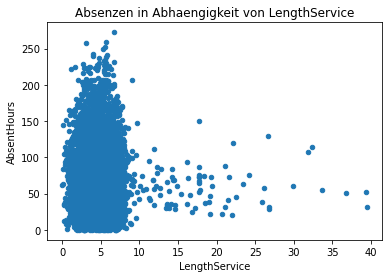

In [5]:
# Zusammenhang Anzahl Jahre im Betirbe (LengthService) und Absenzen (AbsentHours)
data.plot.scatter(x = "LengthService", y = "AbsentHours")
plt.title("Absenzen in Abhaengigkeit von LengthService")
plt.show()

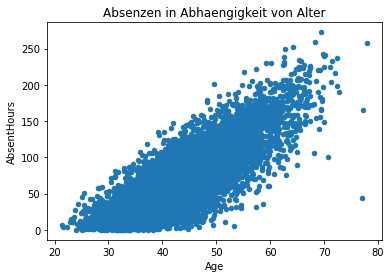

In [6]:
# Zusammenhang Alter (Age) und Absenzen (AbsentHours)
data.plot.scatter(x = "Age", y = "AbsentHours")
plt.title("Absenzen in Abhaengigkeit von Alter")
plt.show()

In [7]:
# Fitten der Daten mit einem Linearen Modell
absenthours = data["AbsentHours"].values.reshape(-1,1)

lengthservice = data["LengthService"].values.reshape(-1,1)
age = data["Age"].values.reshape(-1,1)

model1 = LinearRegression().fit(age, absenthours)
model2 = LinearRegression().fit(lengthservice, absenthours)

In [8]:
y = data["AbsentHours"].values.reshape(-1,1)
x = data["Age"].values.reshape(-1,1)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
steigung = model.coef_
achsenabschnitt = model.intercept_

print("absenthours = {0} * age + {1}, R2 = {2}".format(steigung, achsenabschnitt, r_sq))


absenthours = [[4.30605265]] * age + [-118.51170857], R2 = 0.6493487820751211


In [9]:
# Bestimmtheitsmass R2, Steigung und Achsenabschnitt
## 1 - Fuer age und absenthours
r_sq_1 = model1.score(age, absenthours)
steigung_1 = model1.coef_
achsenabschnitt_1 = model1.intercept_
print("absenthours = {0} * age + {1}, R2 = {2}".format(steigung_1, achsenabschnitt_1, r_sq_1))

## 2 - Fuer lengthservice und absenthours
r_sq_2 = model2.score(lengthservice, absenthours)
steigung_2 = model2.coef_
achsenabschnitt_2 = model2.intercept_
print("absenthours = {0} * lengthservice + {1}, R2 = {2}".format(steigung_2, achsenabschnitt_2, r_sq_2))

absenthours = [[4.30605265]] * age + [-118.51170857], R2 = 0.6493487820751211
absenthours = [[-0.46065175]] * lengthservice + [74.99104238], R2 = 0.0005010210095048873


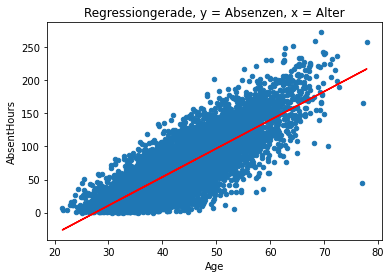

In [10]:
# Age und Absenthours
data.plot.scatter("Age", "AbsentHours")
plt.plot(x, steigung * x + achsenabschnitt, color = "r")
plt.title("Regressiongerade, y = Absenzen, x = Alter")
plt.show()

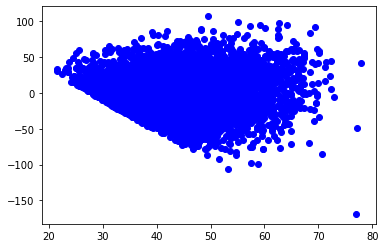

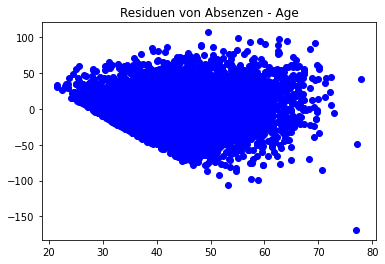

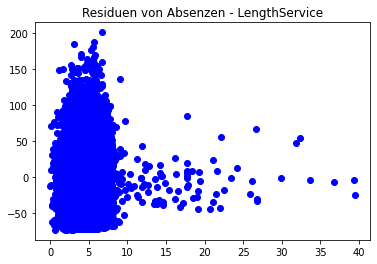

In [11]:
# Residuen

# Vorhersage berechnen
predictabsence1 = model1.predict(age)
predictabsence2 = model2.predict(lengthservice)

# Vorhersage berechnen
predictabsence = model.predict(age) # x = age, y = predictabsence

# Residuen wird berechnet
residuen = absenthours - predictabsence 

# Residuen plotten
plt.plot(age, residuen, "o", color = "b")
plt.show()

# Residuen berechnen
resid1 = absenthours - predictabsence1
resid2 = absenthours - predictabsence2

plt.plot(age, resid1, "o", color = "b")
plt.title("Residuen von Absenzen - Age")
plt.show()

plt.plot(lengthservice, resid2, "o", color = "b")
plt.title("Residuen von Absenzen - LengthService")
plt.show()

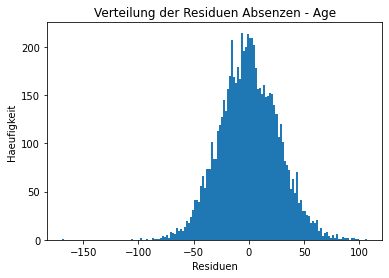

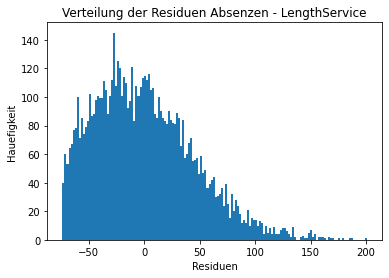

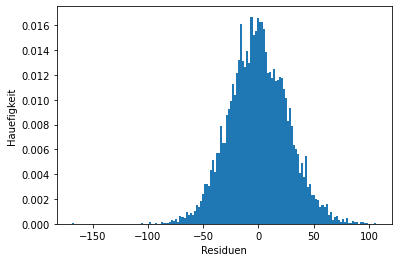

In [17]:
from scipy.stats import norm
# Ueberpruefen, ob die Residuen Normalverteilt sind.

# Residuen Age und Absent
plt.hist(resid1, bins=150, stacked = True, density = False)
plt.xlabel("Residuen")
plt.ylabel("Haeufigkeit")
plt.title("Verteilung der Residuen Absenzen - Age")
plt.show()


# Residuen Lengthservice und Absent
plt.hist(resid2, bins = 150, stacked = True, density = False)
plt.xlabel("Residuen")
plt.ylabel("Hauefigkeit")
plt.title("Verteilung der Residuen Absenzen - LengthService")
plt.show()


plt.hist(residuen, bins = 150, stacked = True, density = True)
plt.xlabel("Residuen")
plt.ylabel("Hauefigkeit")
plt.show()